In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from enum import unique
from sklearn import preprocessing

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rmarquez93/data_masterbdds2022/main/Act%201%20Modulo%206.csv", sep=";")
df.shape

(8664, 15)

In [3]:
df.head()


,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,avg_vote_weighted,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
0,tt0010323,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,Werner Krauss,8.1,55601,7.99,$ 18000,$ 8811,237,160
1,tt0012190,The Four Horsemen of the Apocalypse,1921,"Drama, Romance, War",150,USA,Rex Ingram,Pomeroy Cannon,7.2,3058,6.61,$ 800000,$ 9183673,45,16
2,tt0014624,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,Charles Chaplin,Edna Purviance,7.0,4735,6.61,$ 351000,$ 11233,37,24
3,tt0015864,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,Charles Chaplin,Charles Chaplin,8.2,97480,8.13,$ 923000,$ 26916,190,125
4,tt0018455,Sunrise: A Song of Two Humans,1927,"Drama, Romance",94,USA,F.W. Murnau,George O'Brien,8.1,46069,7.97,$ 200000,$ 121107,250,186


Una vez cargado el dataset y observada su forma (8.664 observaciones para 15 variables) procedo a realizar las confirmaciones solicitadas.

Comienzo entonces eliminando el signo de $ tanto en la variable budget como en worldwide_gross_income. A su vez, las transformo a variables enteras como fue requerido.

In [4]:
df["budget"] = df["budget"].str.replace(r"$","", regex = True)
df["budget"] = df["budget"].astype(int)
df["worlwide_gross_income"] = df["worlwide_gross_income"].str.replace(r"$","", regex = True)
df["worlwide_gross_income"] = df["worlwide_gross_income"].astype(int)

Para la transformación de las variables categóticas, utilizo el módulo de preprocessing de SickIt. En el mismo, genero la instancia Label Encoder para transformar las variables categóricas a numéricas para cada una de las variables que preciso transformar. Exceptúo la transformación del título original de la película ya que con "imdb_title_id" es suficiente.

In [5]:
for i in ["imdb_title_id", "genre", "country", "director", "actors"]:
  df[i] = preprocessing.LabelEncoder().fit_transform(df[i])

df.head()

,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,avg_vote_weighted,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
0,0,Das Cabinet des Dr. Caligari,1920,407,76,281,3282,3869,8.1,55601,7.99,18000,8811,237,160
1,1,The Four Horsemen of the Apocalypse,1921,377,150,807,3145,3040,7.2,3058,6.61,800000,9183673,45,16
2,2,A Woman of Paris: A Drama of Fate,1923,372,82,807,561,1058,7.0,4735,6.61,351000,11233,37,24
3,3,The Gold Rush,1925,94,95,807,561,624,8.2,97480,8.13,923000,26916,190,125
4,4,Sunrise: A Song of Two Humans,1927,372,94,807,1146,1301,8.1,46069,7.97,200000,121107,250,186


Una vez tengo las variables en el formato que preciso para trabajar, procedo a generar submuestras de train y test para el primer modelo. Dicho modelo refiere a la estimación de la recaudación de una película, dadas las variables: genre, duration, country, director, actors y Budget.

Para el split de test y train no uso el argumento stratify debido a que se intentará predecir una variable continua y no categórica.

In [6]:


X_train, X_test, y_train, y_test = train_test_split(df[["genre","duration","country","director","actors","budget"]], df['worlwide_gross_income'],
                                                    random_state=42, test_size=0.3 )
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6064, 6) (6064,)
(2600, 6) (2600,)


Lo siguiente que es necesario realizar es la búsqueda de la profundidad máxima del algoritmo. Con esto buscamos mitigar el overfitting y, por lo tanto, la inutilidad del modelo generado para predecir nuevos datos. A su vez, la configuración de un límite de profundidad mejorará la eficiencia y el consumo computacional del modelo.

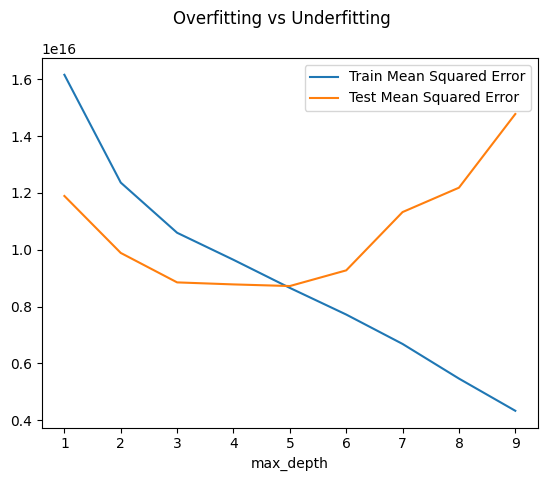

In [7]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  pred_train = tree_model.predict(X_train)
  pred_test = tree_model.predict(X_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))
  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

df_maxdepth = pd.DataFrame({"max_depth":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })
df_maxdepth.set_index("max_depth", inplace=True)

df_maxdepth["mse_train"].plot(label="Train Mean Squared Error")
df_maxdepth["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

A partir de la generación de un dataframe para evaluar, para cada valor que toma max_depth, los valores de MSE y score del modelo procedo a elegir una profundidad máxima de 3. Esto se debe a que, para el conjunto de test, este punto es un lugar de quiebre donde se minimiza el error y se maximiza la bondad de ajuste del modelo.

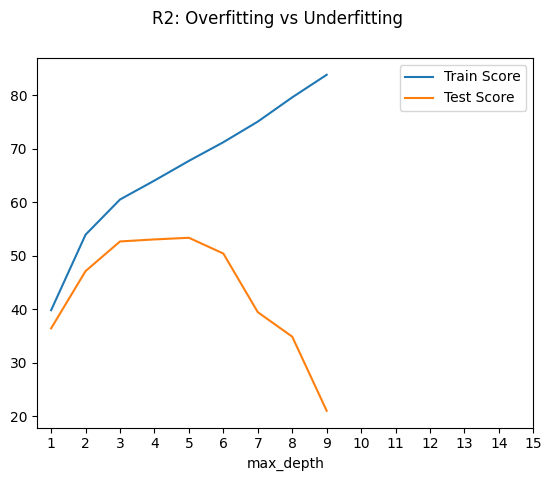

In [8]:
df_maxdepth["score_train"].plot(label="Train Score")
df_maxdepth["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.xticks(range(1,16))
plt.legend()
plt.show();

El MSE del modelo de entrenamiento es de 60.52 %. Tomo tal valor como bueno y sigo evaluando el árbol.

In [9]:
tree_model = DecisionTreeRegressor(random_state=0, max_depth=3)
tree_model.fit(X_train, y_train)
pred_train = tree_model.predict(X_train)
print (r2_score(y_train, pred_train))

0.6052486806043749


Al analizar la importancia relativa de las variables generadas, se puede ver una fuerte preponderancia del presupuesto de la película sobre el retorno generado de la misma. Yendo a su vez a un mayo grado de detalle, lo mismo se puede explicitar en el árbol que genera el algoritmo.

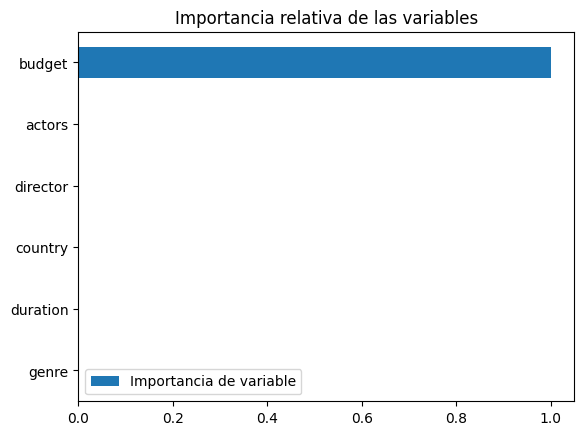

In [10]:
df_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=X_train.columns, index=["Importancia de variable"])
df_imp.T.plot.barh()
plt.legend()
plt.title("Importancia relativa de las variables")
plt.show();

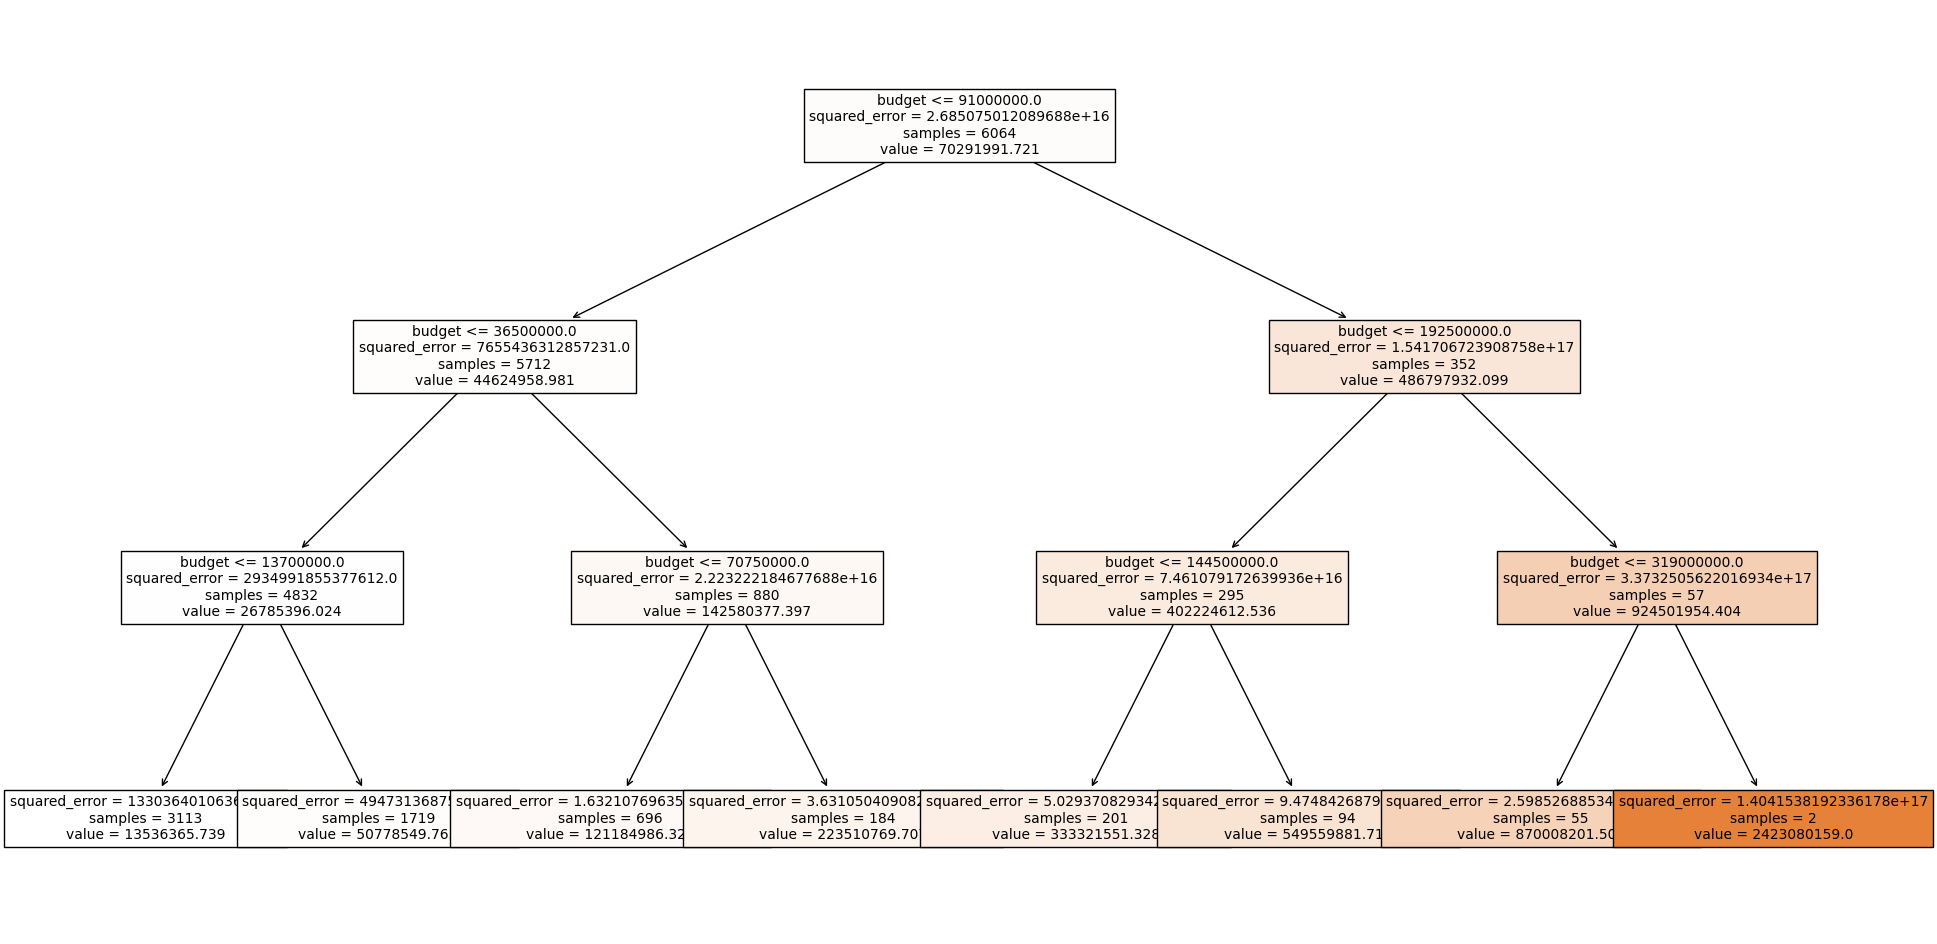

In [11]:
plt.figure(figsize=(24,12))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=X_train.columns, class_names=["Y"] , fontsize=10)
plt.show()


En el arbol de decisión, se puede ver que las "preguntas" que se realiza el modelo son referentes a la inversión realizada para determinar el valor esperado de retorno para cada uno de los casos. A su vez, el modelo, al ser un problema de regresión, intenta minimizar el MSE en cada nivel de decisión.

Al intentar predecir; procedo a tomar dos películas en concreto para ver como performa el modelo.

En el caso de Tenet, se puede ver que el valor predicho es significativamente mas alto del valor real de la misma. Esto se debe principalmente a la preponderancia del presupuesto sobre la predicción del ingreso generado por la película. Para este ejemplo en particular, Tenet se conoce que no ha obtenido el rendimiento esperado ya que si bien es una "mega producción" su venta de entradas no ha sido buena.

Al seguir el gráfico del árbol que se mostró arriba, se puede ver que, tomando las decisiones(de tipo "Si/No") para el caso de ejemplo, se llega como último nodo hoja a un valor esperado de 870.008.201 (mismo valor que el predicho con el método .predict del modelo).

In [12]:
int(tree_model.predict(df.loc[df["original_title"] == "Tenet",["genre","duration","country","director","actors","budget"]]))


870008201

In [13]:
df.loc[df["original_title"] == "Tenet",["budget","worlwide_gross_income"]]

,budget,worlwide_gross_income
8491,205000000,53600000


Al ir al caso de Gretel & Hansel se puede notar que la predicción tiene menor diferencia con el valor real, pero que igualmente no funciona de manera óptima.

Como se puede ver, el modelo generado sirve para "categorizar" o incluir dentro de "buckets" los ingresos esperados pero no es el óptimo para generar una regresión (como tal vez si lo sería un modelo de regresión lineal). Esto se debe para este caso en concreto al hecho de que los valores devueltos como predicción corresponden a la media de cada uno de los nodos-hoja generados. Lo anterior, combinado a que solamente toma como importante la variable budget genera que la predicción no sea la óptima.

In [14]:
int(tree_model.predict(df.loc[df["original_title"] == "Gretel & Hansel",["genre","duration","country","director","actors","budget"]]))

13536365

In [15]:
df.loc[df["original_title"] == "Gretel & Hansel",["budget","worlwide_gross_income"]]

,budget,worlwide_gross_income
8652,5000000,21966625


A partir del análisis anterior de las variables, decido entonces generar un segundo modelo que tome en cuenta solamente a la variable budget y verificar el rendimiento del mismo.

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df[["budget"]], df['worlwide_gross_income'],
                                                    random_state=42, test_size=0.3 )
print (X1_train.shape, y1_train.shape)
print (X1_test.shape, y1_test.shape)

(6064, 1) (6064,)
(2600, 1) (2600,)


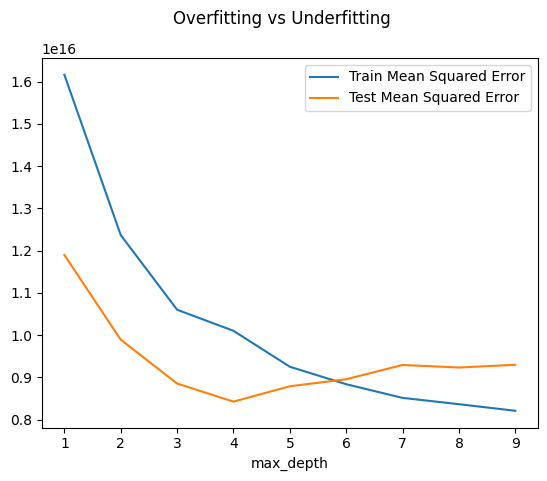

In [17]:
md_list1 = []
score_train_list1 = []
score_test_list1 = []
mse_train_list1 = []
mse_test_list1 = []

for maxdepth in list(range(1,10)):
  tree_model1 = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model1.fit(X1_train, y1_train)

  pred_train1 = tree_model1.predict(X1_train)
  pred_test1 = tree_model1.predict(X1_test)

  ## Generación de listas
  md_list1.append(maxdepth)
  score_train_list1.append(100.0*tree_model1.score(X1_train, y1_train))
  score_test_list1.append(100.0*tree_model1.score(X1_test, y1_test))
  mse_train_list1.append(mean_squared_error(y1_train, pred_train1))
  mse_test_list1.append(mean_squared_error(y1_test, pred_test1))

df_maxdepth1 = pd.DataFrame({"max_depth":md_list1,
                   "score_train":score_train_list1,
                   "score_test":score_test_list1,
                   "mse_train":mse_train_list1,
                   "mse_test":mse_test_list1
                   })
df_maxdepth1.set_index("max_depth", inplace=True)

df_maxdepth1["mse_train"].plot(label="Train Mean Squared Error")
df_maxdepth1["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

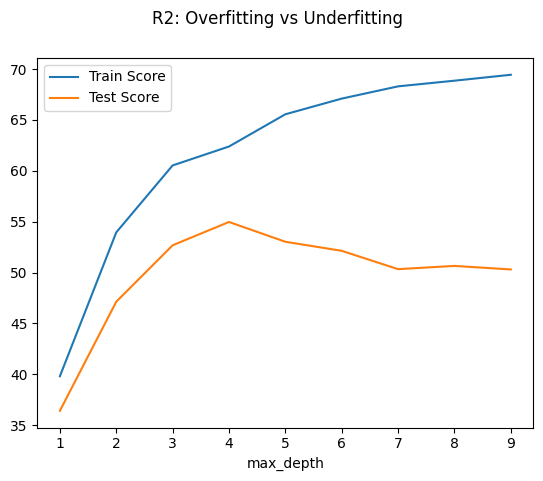

In [18]:
df_maxdepth1["score_train"].plot(label="Train Score")
df_maxdepth1["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

In [19]:
tree_model1 = DecisionTreeRegressor(random_state=0, max_depth=4)
tree_model1.fit(X1_train, y1_train)
pred_train1 = tree_model1.predict(X1_train)
print (r2_score(y1_train, pred_train1))

0.6238389190231199


Al utilizar solamente la variable budget, la profundidad máxima sube a 4 ya que es el punto de quiebre que se puede observar donde R2 empieza a empeorar y el error del modelo sube para el conjunto de testing.

A su vez, al utilizar solamente budget R2 mejora minimamente con respecto al modelo anterior (62.38 % vs 60.52% respectivamente).

Para el caso de las predicciones, se observa que las predicciones aún distan mucho de los valores reales de las películas ya que las predicciones corresponden a la media de la hoja-nodo en la que cae cada una de las observaciones.

In [20]:
int(tree_model1.predict(df.loc[df["original_title"] == "Tenet",["budget"]]))


765424583

In [21]:
df.loc[df["original_title"] == "Tenet",["budget","worlwide_gross_income"]]

,budget,worlwide_gross_income
8491,205000000,53600000


In [22]:
int(tree_model1.predict(df.loc[df["original_title"] == "Gretel & Hansel",["budget"]]))

20208600

In [23]:
df.loc[df["original_title"] == "Gretel & Hansel",["budget","worlwide_gross_income"]]

,budget,worlwide_gross_income
8652,5000000,21966625


Una vez analizado el modelo anterior, paso a generar el segundo solicitado. Este modelo intentará predecir la media ponderada de calificaciones de la película basados en las variables "genre", "duration", "country", "director", "actors", "budget", "worlwide_gross_income", "reviews_from_users" y "reviews_from_critics".

Como primer paso hago el split de train y test del modelo.

In [24]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df[["genre", "duration", "country", "director", "actors", "budget",
                                                        "worlwide_gross_income", "reviews_from_users", "reviews_from_critics"]], df["avg_vote_weighted"],
                                                    random_state=42, test_size=0.3 )
print (X2_train.shape, y2_train.shape)
print (X2_test.shape, y2_test.shape)

(6064, 9) (6064,)
(2600, 9) (2600,)


A continuación vuelvo a generar la iteración para encontrar la profundidad óptima.

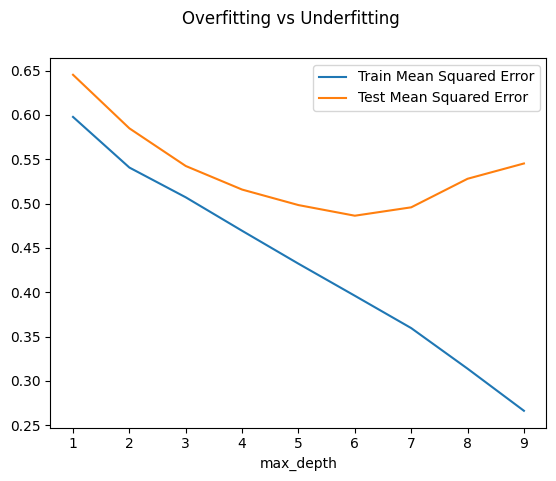

In [25]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model.fit(X2_train, y2_train)

  pred_train = tree_model.predict(X2_train)
  pred_test = tree_model.predict(X2_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X2_train, y2_train))
  score_test_list.append(100.0*tree_model.score(X2_test, y2_test))
  mse_train_list.append(mean_squared_error(y2_train, pred_train))
  mse_test_list.append(mean_squared_error(y2_test, pred_test))

df_maxdepth2 = pd.DataFrame({"max_depth":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })
df_maxdepth2.set_index("max_depth", inplace=True)

df_maxdepth2["mse_train"].plot(label="Train Mean Squared Error")
df_maxdepth2["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

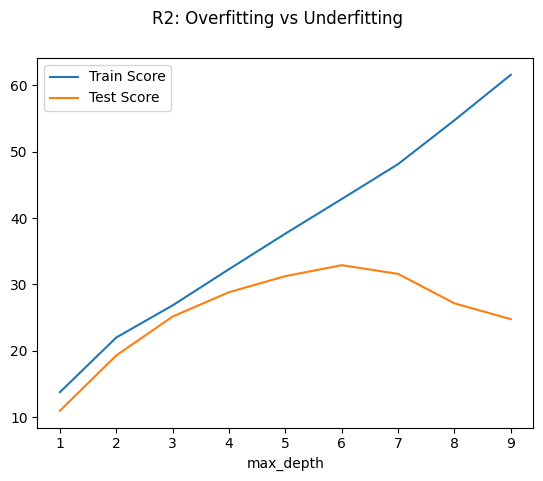

In [26]:
df_maxdepth2["score_train"].plot(label="Train Score")
df_maxdepth2["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

Como se puede ver a partir de las gráficas anteriores, cuando la profundidad es 6, se llega a un punto de quiebre tanto a nivel de la evolución del error del modelo como también a nivel de R2. En el caso de la submuestra de test se puede ver que R2 va creciendo hasta una profundidad de 6, pero luego empieza a decrecer debido a que una mayor profundidad solamente servirá para ajustar muy bien el modelo para el conjunto de train pero no para predecir otro (overfitting).

Cabe destacar, a pesar de lo anterior, que el R2 sigue siendo bajo con un valor de 42,87%.

In [27]:
tree_model2 = DecisionTreeRegressor(random_state=0, max_depth=6)
tree_model2.fit(X2_train, y2_train)
pred_train2 = tree_model2.predict(X2_train)
print (r2_score(y2_train, pred_train2))

0.4286783890349182


Al analizar las variables, se observa una importancia alta de duration, review_from_users, review_from_critics, genre y budget. A su vez, la variable mas importante es review_from_users; esto tiene sentido ya que la media ponderada de calificaciones estará íntegramente relacionada a las calificaciones efectuadas en un primer momento.

Dado lo anterior, voy a proceder a generar un segundo modelo eliminando variables de importancia minoritaria tales como:

* actors
* country

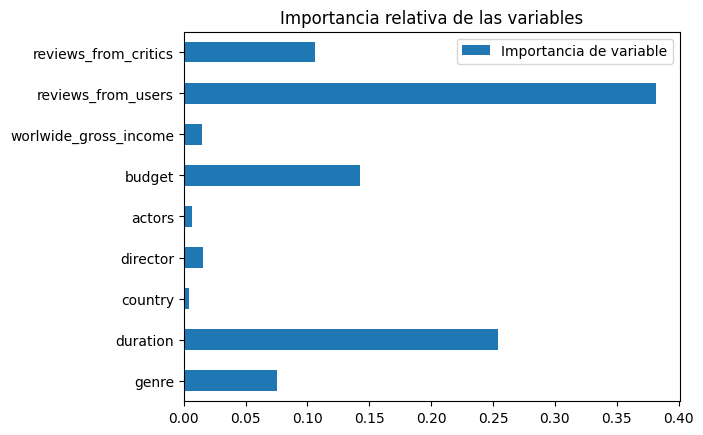

In [28]:
df_imp2 = pd.DataFrame(tree_model2.feature_importances_.reshape(1,-1), columns=X2_train.columns, index=["Importancia de variable"])
df_imp2.T.plot.barh()
plt.legend()
plt.title("Importancia relativa de las variables")
plt.show();

In [29]:
X3_train, X3_test, y3_train, y3_test = train_test_split(df[["genre", "duration", "director", "budget",
                                                        "worlwide_gross_income", "reviews_from_users", "reviews_from_critics"]], df["avg_vote_weighted"],
                                                    random_state=42, test_size=0.3 )
print (X3_train.shape, y3_train.shape)
print (X3_test.shape, y3_test.shape)

(6064, 7) (6064,)
(2600, 7) (2600,)


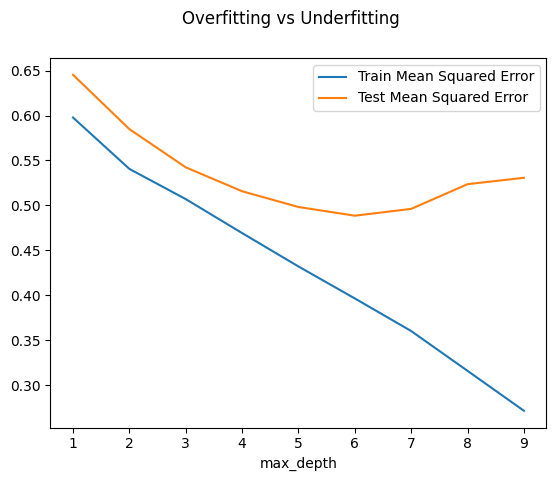

In [30]:
md_list3 = []
score_train_list3 = []
score_test_list3 = []
mse_train_list3 = []
mse_test_list3 = []

for maxdepth in list(range(1,10)):
  tree_model3 = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model3.fit(X3_train, y3_train)

  pred_train3 = tree_model3.predict(X3_train)
  pred_test3 = tree_model3.predict(X3_test)

  ## Generación de listas
  md_list3.append(maxdepth)
  score_train_list3.append(100.0*tree_model3.score(X3_train, y3_train))
  score_test_list3.append(100.0*tree_model3.score(X3_test, y3_test))
  mse_train_list3.append(mean_squared_error(y3_train, pred_train3))
  mse_test_list3.append(mean_squared_error(y3_test, pred_test3))

df_maxdepth3 = pd.DataFrame({"max_depth":md_list3,
                   "score_train":score_train_list3,
                   "score_test":score_test_list3,
                   "mse_train":mse_train_list3,
                   "mse_test":mse_test_list3
                   })
df_maxdepth3.set_index("max_depth", inplace=True)

df_maxdepth3["mse_train"].plot(label="Train Mean Squared Error")
df_maxdepth3["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

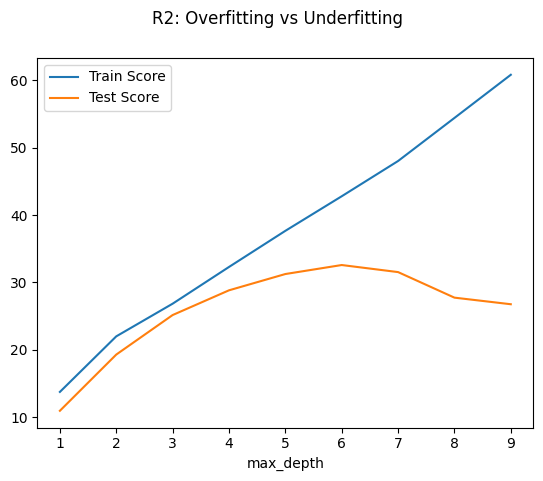

In [31]:
df_maxdepth3["score_train"].plot(label="Train Score")
df_maxdepth3["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

In [32]:
tree_model3 = DecisionTreeRegressor(random_state=0, max_depth=6)
tree_model3.fit(X3_train, y3_train)
pred_train3 = tree_model3.predict(X3_train)
print (r2_score(y3_train, pred_train3))

0.427802504316516


Como se puede ver de lo generado anteriormente, al eliminar esas dos variables el R2 casi no cambia respecto al modelo anterior (48.78% vs 42,87% del anterior). A su vez, al eliminar dichas variables sin generar el riesgo de underfitting estamos reduciendo la dimensionalidad del dataset y su potencial sobreajuste.

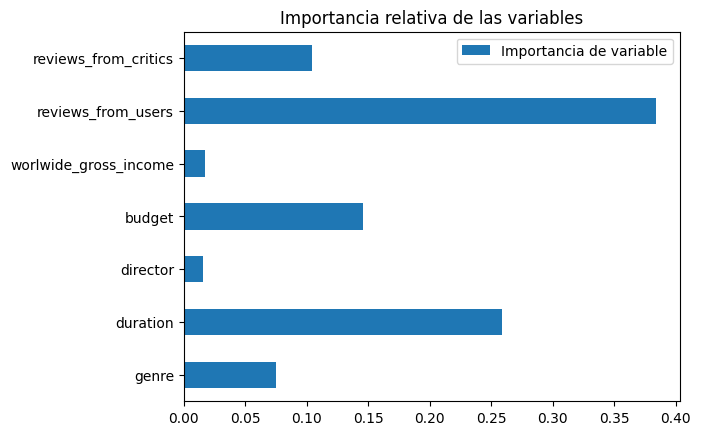

In [33]:
df_imp3 = pd.DataFrame(tree_model3.feature_importances_.reshape(1,-1), columns=X3_train.columns, index=["Importancia de variable"])
df_imp3.T.plot.barh()
plt.legend()
plt.title("Importancia relativa de las variables")
plt.show();

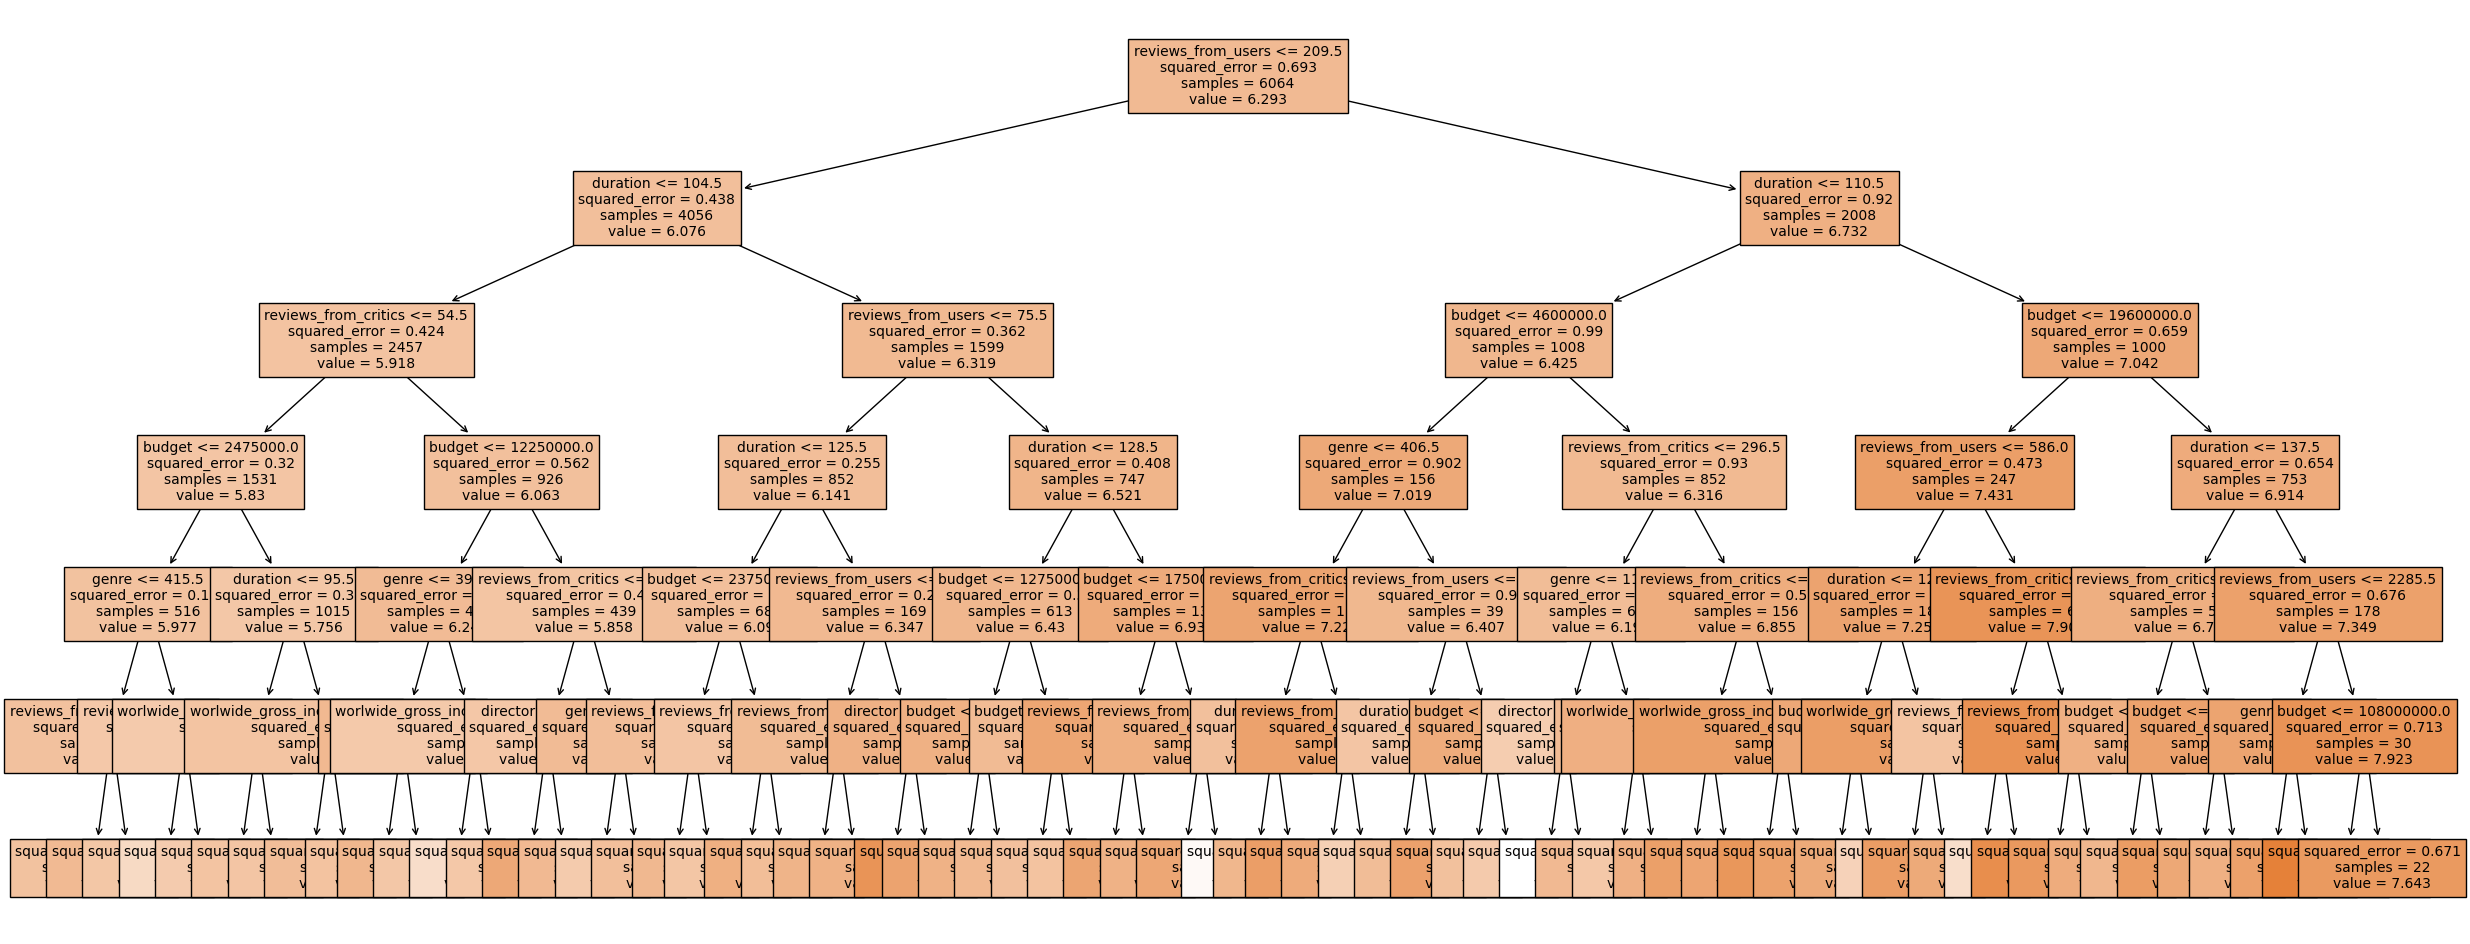

In [34]:
plt.figure(figsize=(30,12))
plot_tree(tree_model3, filled=True, max_depth=6, feature_names=X3_train.columns, class_names=["Y"] , fontsize=10)
plt.show()

Para ver la capacidad predictiva del modelo, voy a utilizar dos películas y comparar su media ponderada de calificaciones real contra la predicha.

A partir de los ejemplos de debajo, se puede ver que la predicción es bastante acertada en casos que se aproximan a la media de la categoría en la que caen en el árbol (ej.: Titanic con una diferencia muy baja entre lo predicho y lo real) pero falla bastante a la hora de predecir películas que se desvían de dicha media como es en el caso de Scary Movie 5.

In [35]:
print("predicción Titanic:")
float(tree_model3.predict(df.loc[df["original_title"] == "Titanic",["genre", "duration", "director", "budget",
                                                        "worlwide_gross_income", "reviews_from_users", "reviews_from_critics"]]))

predicción Titanic:


7.643181818181817

In [36]:
print("Valor real Titanic:")
df.loc[df["original_title"] == "Titanic",["avg_vote_weighted"]]

Valor real Titanic:


,avg_vote_weighted
2474,7.79


In [37]:
print("Predicción Scary Movie 5:")
float(tree_model3.predict(df.loc[df["original_title"] == "Scary Movie 5",["genre", "duration", "director", "budget",
                                                        "worlwide_gross_income", "reviews_from_users", "reviews_from_critics"]]))

Predicción Scary Movie 5:


6.330392156862748

In [38]:
print("Valor real Scary Movie 5:")
df.loc[df["original_title"] == "Scary Movie 5",["avg_vote_weighted"]]

Valor real Scary Movie 5:


,avg_vote_weighted
5103,3.61
